### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### load the dataset and check few rows

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

### Chek Null  values

In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Handle null values
#### replace catogorical values with mode and numerical value with mean

In [6]:
for column in df.columns:
    if df[column].dtype == 'O':  # Categorical columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after handling:", df.isnull().sum())
print("after handle missing value data set shape",df.shape)

Missing values after handling: area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64
after handle missing value data set shape (13320, 9)


C:\Users\Asus\AppData\Local\Temp\ipykernel_14784\404675599.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14784\404675599.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

### Chek Duplicates values

In [7]:
df.duplicated()
df.shape

(13320, 9)

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(12791, 9)

 ### Detect and remove the outlair in bath column

<Axes: >

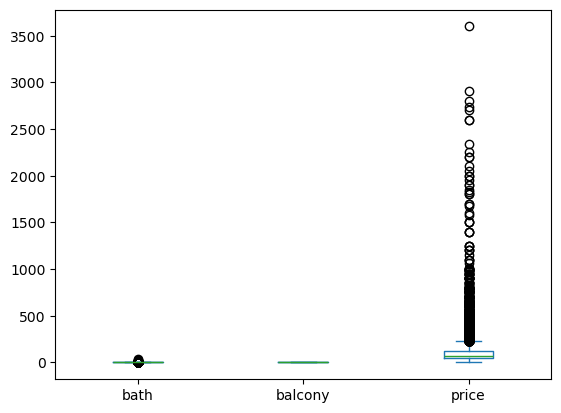

In [9]:
df.plot(kind = "box")

In [10]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Specify the columns to remove outliers from
columns_to_remove_outliers = ['bath','price']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, columns_to_remove_outliers)

# Display the shape of the cleaned DataFrame
print("Original shape:", df.shape)
print("New shape after outlier removal:", df_cleaned.shape)
print("total no of  remove rowa:",13320-11213)

Original shape: (12791, 9)
New shape after outlier removal: (10720, 9)
total no of  remove rowa: 2107


In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### create a new feature like BHK
#### This code extracts the first number from the "size" column and converts it to an integer

In [12]:
df['BHK'] = df['size'].str.split().str.get(0).astype(int)      

In [13]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00,2


<Axes: ylabel='Frequency'>

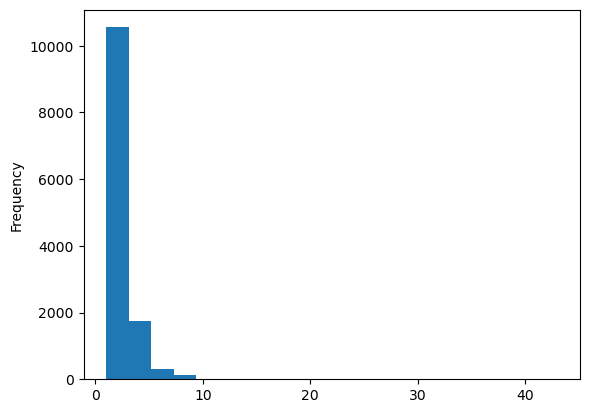

In [14]:
df['BHK'].plot(kind='hist',bins=20)

In [15]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def range_converer(x):                                       
    N = x.split('-')
    if len(N) == 2:                                 #This function converts range values into a fix integer and their average or returns a float; errors return None.
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df['total_sqft'] = df['total_sqft'].apply(range_converer)

In [18]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [19]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [20]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [21]:
location_count = df['location'].value_counts()
location_count

location
Whitefield                        524
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

##### This code filters out locations that appear 5 times or fewer and stores them in location_count_less.

In [22]:
location_count_less = location_count[location_count <=5]
location_count_less

location
Coconut Grove Layout              5
Maithri Layout                    5
VGP Layout                        5
Mallathahalli                     5
Bellari Road                      5
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: count, Length: 925, dtype: int64

##### This line of code replaces less frequent locations (those appearing 5 times or fewer) with 'other' in the df['location'] column.

In [23]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less else x)

In [24]:
df['location'].value_counts()

location
other              1831
Whitefield          524
Sarjapur  Road      379
Electronic City     287
Kanakpura Road      249
                   ... 
Srinivasa Nagar       6
Doddakannelli         6
Kumara Park           6
Byrathi Village       6
Siddapura             6
Name: count, Length: 381, dtype: int64

In [25]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,12745.000000,12791.000000,12791.000000,12791.000000,12791.000000
mean,1540.479821,2.708511,1.582405,114.317646,2.816824
std,1265.315806,1.353884,0.802846,151.480310,1.311339
min,0.500000,1.000000,0.000000,8.000000,1.000000
25%,1095.000000,2.000000,1.000000,50.000000,2.000000
50%,1270.000000,2.000000,2.000000,73.000000,3.000000
75%,1676.000000,3.000000,2.000000,121.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [26]:
df = df[(df['total_sqft']/df['BHK'])>=300]  #Filters out properties where per BHK space is below 300 sqft, ensuring reasonable apartment sizes.
df = df[df['BHK'] <= 5]                     # Keeps only properties where BHK ≤ 5, removing luxury or unrealistic listings with more than 5 BHKs.
df = df[df['bath'] <= 5]                    # Keeps only properties where bathrooms ≤ 5, removing listings with excessive bathrooms.

In [27]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11518.000000,11518.000000,11518.000000,11518.000000,11518.000000
mean,1542.638700,2.474742,1.600654,106.068837,2.576489
std,1130.773553,0.858321,0.780026,130.929383,0.790019
min,300.000000,1.000000,0.000000,8.440000,1.000000
25%,1110.000000,2.000000,1.000000,49.342500,2.000000
50%,1297.000000,2.000000,2.000000,70.000000,3.000000
75%,1674.000000,3.000000,2.000000,111.000000,3.000000
max,52272.000000,5.000000,3.000000,2912.000000,5.000000


In [28]:
df.shape

(11518, 10)

In [29]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [30]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


In [31]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11518.000000,11518.000000,11518.000000,11518.000000,11518.000000
mean,1542.638700,2.474742,1.600654,106.068837,2.576489
std,1130.773553,0.858321,0.780026,130.929383,0.790019
min,300.000000,1.000000,0.000000,8.440000,1.000000
25%,1110.000000,2.000000,1.000000,49.342500,2.000000
50%,1297.000000,2.000000,2.000000,70.000000,3.000000
75%,1674.000000,3.000000,2.000000,111.000000,3.000000
max,52272.000000,5.000000,3.000000,2912.000000,5.000000


In [32]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200.0,2.0,1.0,51.00,2


### Apply label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
for col in ['area_type','availability','location','size','society','total_sqft','bath','balcony','price','BHK']:
  df[col] = le.fit_transform(df[col])     

df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,3,40,134,3,446,359,1,1,347,1
1,2,80,101,8,2375,1456,5,4,1475,3
2,0,80,354,5,778,747,1,4,963,2
3,3,80,242,5,2126,819,3,1,1403,2
4,3,80,232,3,778,504,1,1,701,1
5,3,80,372,3,583,474,1,1,312,1
6,3,34,285,7,910,1481,4,2,1556,3
7,3,80,300,7,345,1596,4,2,1748,3
8,3,80,255,5,778,617,3,1,988,2
10,3,29,372,5,778,1085,1,3,1116,2


#### Ploting relation between tatal_sqft and Price

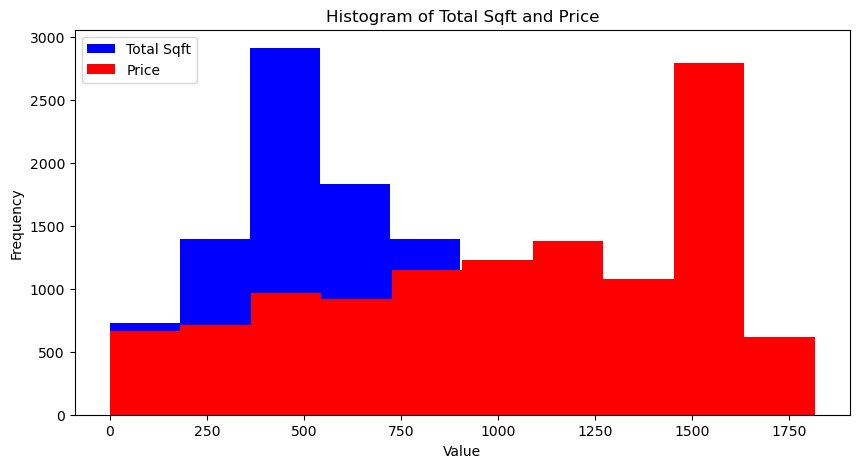

In [34]:
# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df['total_sqft'], bins=10,label='Total Sqft', color='blue')
plt.hist(df['price'], bins=10,label='Price', color='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Total Sqft and Price')
plt.legend()
plt.show()

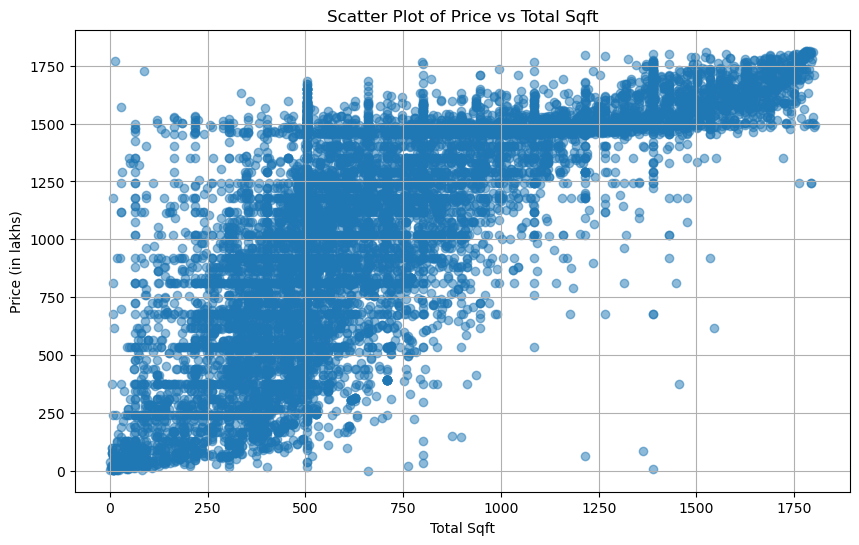

In [35]:
# Scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Total Sqft')
plt.xlabel('Total Sqft')
plt.ylabel('Price (in lakhs)')
plt.grid(True)
plt.show()


### Create a ColumnTransformer and apply onehotencoding and StandardScaler on data

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['location']),  # Encode categorical column
        ('scaler', StandardScaler(), ['total_sqft', 'BHK','bath'])  # Scale numerical columns
    ],
    remainder='passthrough'
)

### Creating a Heatmap

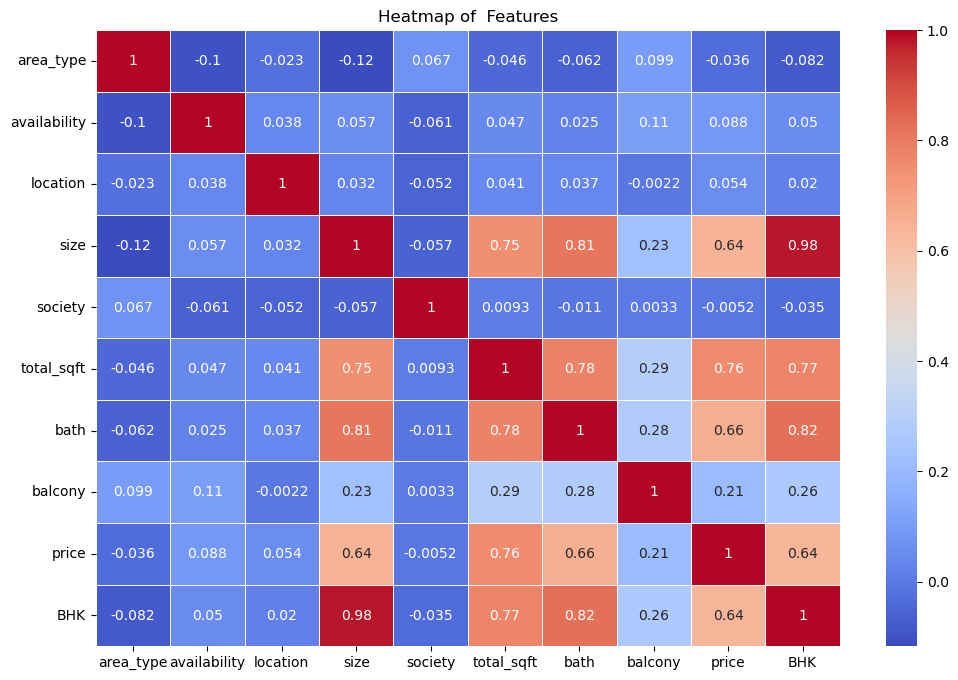

In [37]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True,  cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Heatmap of  Features")

# Show the plot
plt.show()

### feature selection

In [38]:
target_correlation = corr_matrix['price'].sort_values(ascending=False)
print("Correlation with Target Variable (Price):")
print(target_correlation)


Correlation with Target Variable (Price):
price           1.000000
total_sqft      0.756255
bath            0.656859
size            0.644364
BHK             0.636976
balcony         0.205609
availability    0.087554
location        0.054201
society        -0.005209
area_type      -0.035864
Name: price, dtype: float64


### Drop Unneccesary column like society, balcony, availability, area_type,size

In [39]:
df.drop(columns=['area_type','availability','society','balcony','size' ] , inplace=True)

In [40]:
df.sample(10)

,location,total_sqft,bath,price,BHK
11200,118,1133,3,1475,2
9574,285,1489,4,1550,3
11011,65,469,1,1018,1
9140,372,1532,3,1551,3
1494,200,1058,3,1480,2
12179,299,801,3,1329,2
4814,380,847,3,1178,2
768,230,1043,3,1485,2
8559,24,304,1,312,1
759,358,1487,4,1509,3


#### separating the data and labels

In [41]:
X = df[['location', 'total_sqft', 'bath', 'BHK']]  # Select specific features
Y = pd.DataFrame(df['price'])  # Target column

In [42]:
X.head()

,location,total_sqft,bath,BHK
0,134,359,1,1
1,101,1456,5,3
2,354,747,1,2
3,242,819,3,2
4,232,504,1,1


In [43]:
Y.head()

,price
0,347
1,1475
2,963
3,1403
4,701


### Train Test split

In [44]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split (X , Y, test_size= 0.25 , random_state=42)

In [45]:
print("Shape of Original datasets : " , df.shape)

Shape of Original datasets :  (11518, 5)


In [46]:
print("Shape of X training data : " ,X_train.shape)
print("Shape of X test data : " , X_test.shape)
print("Shape of Y training data : " , Y_train.shape)
print("Shape of Y test data : " , Y_test.shape)

Shape of X training data :  (8638, 4)
Shape of X test data :  (2880, 4)
Shape of Y training data :  (8638, 1)
Shape of Y test data :  (2880, 1)


In [47]:
X_train.columns

Index(['location', 'total_sqft', 'bath', 'BHK'], dtype='object')

In [48]:
Y_train.columns

Index(['price'], dtype='object')

In [49]:
Y_train.isnull().sum()

price    0
dtype: int64

In [50]:
Y_train.isnull().sum()

price    0
dtype: int64

In [51]:
Y_train.shape

(8638, 1)

In [52]:
Y_test.shape

(2880, 1)

### Training  a model 

#### RandomForestRegressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model

RandomForestRegressor()

### Create a pipeline and apply  model

In [54]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline (ct, model)

In [55]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor', RandomForestRegressor())])

### fit X_train , Y_train

In [56]:
pipe.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [57]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = pipe.predict(X_test)
print("R2 Score:" , r2_score(Y_test ,y_pred))
print('mse',mean_squared_error(Y_test, y_pred))

R2 Score: 0.7325951979931278
mse 60090.40536597868


In [58]:
Y_test.head()

,price
1200,1234
2708,721
9300,726
4958,1416
3256,1470


In [59]:
X_train.head()

,location,total_sqft,bath,BHK
13318,288,1736,4,3
4624,208,256,1,1
12420,380,847,1,2
1003,156,337,1,1
12314,380,504,3,2


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

def train_and_compare_models(X, Y):
    

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC()
    }

    # Train and evaluate each model
    results = []
    for name, model in models.items():
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(Y_test, predictions)
        results.append({'Model': name, 'Accuracy': accuracy})

    return pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)


In [62]:
# Assuming X contains features and y contains labels
results_df = train_and_compare_models(X, Y)
print(results_df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

                 Model  Accuracy
1        Decision Tree  0.051042
2                  KNN  0.039931
3                  SVM  0.031250
0  Logistic Regression  0.024653


### save the model

In [63]:
import pickle
pickle.dump(pipe , open('random_forest_house_price_model.pkl', 'wb'))
pickle.dump(df, open('dataset.pkl','wb'))



In [76]:
# Preprocessing
column_trans = ColumnTransformer([
    ('location_ohe', OneHotEncoder(handle_unknown='ignore'), ['location'])
], remainder='passthrough')

# Pipeline with preprocessing + model
pipe = Pipeline([
    ('preprocessor', column_trans),
    ('model', RandomForestRegressor())
])

# Train
pipe.fit(X, y)

# Save
with open('random_forest_house_price_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)


In [77]:
import numpy as np
import pickle

# Load the pipeline
with open('random_forest_house_price_model.pkl', 'rb') as f:
    pipe = pickle.load(f)

def predict_price(location, bath, bhk, total_sqft):
    try:
        # Create a single-row DataFrame with input
        input_df = pd.DataFrame([{
            'location': location,
            'total_sqft': total_sqft,
            'bath': bath,
            'BHK': bhk
        }])

        # Predict
        predicted_price = pipe.predict(input_df)[0]

        return round(predicted_price, 2)  # in lakhs
    except Exception as e:
        return f"Error in prediction: {e}"



In [78]:
price = predict_price('Whitefield', bath=2, bhk=2, total_sqft=1100)
print(f"Predicted Price: ₹{price} lakhs")



Predicted Price: ₹1450.91 lakhs
